#IA - <font color='blue'> Avaliação de algoritmos de AM em Python</font> - Trabalho 4

---
João Vitor Fidelis Cardozo, 769719 \\
Sara Ferreira, 773352

1, 2, 3) Selecionar um conjunto de dados adequado para problemas de classificação (conjunto com
classes nominais);

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import statistics
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.neural_network import MLPClassifier

warnings.filterwarnings('ignore')
X, y = datasets.load_wine(return_X_y=True)  #Conjunto adequado para classificação https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

4) Separar o conjunto de dados em matriz de atributos (X) e vetor de classes (y)

In [19]:
wine = datasets.load_wine()
X = wine.data
y = wine.target

#Código para printar a tabela
data = pd.DataFrame(wine.data, columns=wine.feature_names)   # converting dataset into pandas dataframe for preprocessing
data['class'] = wine.target

Y = data['class']                # Output for each example
X = data.drop('class', axis=1)   # Inputs

data = data.sample(frac=1).sort_index()
data


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


6) Implementar uma função que, dado um conjunto de dados, separe esse conjunto em 10 folds
(10 subconjuntos).

In [21]:
len_df = data.shape[0]
iterations, remaining = int(len_df/10), (len_df%10)
folds = []

#Distribui os elementos do conjunto de forma equivalente, contendo 17 elementos cada subconjunto, pois é a parte inteira da divisão.
for linha in range(10):
  folds.append(data.iloc[(linha*17):(linha+1)*17])

#Redistribuir resto (8 elementos). Redistribui 1 elemento para os 8 primeiros subconjuntos.
for rest in range(remaining):
  folds[rest] = pd.concat([folds[rest], data.iloc[(iterations*10)+rest:(iterations*10)+1+rest]], ignore_index = True)



7) Dados os 10 folds, avaliar um algoritmo de redes neurais usando a estratégia 10-fold crossvalidation, ou seja, em cada uma das 10 iterações, treinar a rede neural em 9 folds (folds de
treinamento) e testar no fold restante (fold de teste), cada vez com um fold de teste diferente.

********************************************************************************
Assumindo que i seja o subconjunto de teste, os outros são de treino, então pra cada iteração, foi denotado i para teste e os outros 9 para treino.

In [22]:
#Vetor para armazenar subconjuntos de teste e de treino
xtrain = []
xtest = []
ytrain = []
ytest = []

for i in range(10):
  testSubset = folds[i]
  x_test, y_test =  testSubset.drop('class', axis=1), testSubset['class']
  xtest.append(x_test), ytest.append(y_test)
  trainSubset = pd.DataFrame(None)
  copia = folds.copy()
  copia.pop(i) #remove o conjunto de teste
  trainSubset = pd.concat(copia) #concatena todos os conjuntos de treino
  y_train, x_train = trainSubset['class'], trainSubset.drop('class', axis=1)
  xtrain.append(x_train), ytrain.append(y_train)


8) A arquitetura da rede neural (quantidade de camadas, número de neurônios entre as camadas,
taxa de aprendizado...) deve ser escolhida de acordo com o conjunto de dados escolhido. Faça
testes.

In [23]:
vector_clfs = []
for i in range(10):
  clf = MLPClassifier(hidden_layer_sizes=(11, 11, 11), max_iter=500)
  vector_clfs.append(clf.fit(xtrain[i], ytrain[i]))

9)Escolha um dos folds para mostrar os pesos conectando todas as camadas da sua rede;

In [32]:
chosen_fold = vector_clfs[len(vector_clfs)-2]
print('Pesos entre a entrada e a camada escondida:')
print(chosen_fold.coefs_[0])
print('\n')
print('Pesos entre a primeira camada escondidada e a segunda camada escondida:')
print(chosen_fold.coefs_[1])

Pesos entre a entrada e a camada escondida:
[[ 4.81217221e-01 -8.26434739e-03  3.20625643e-02  7.77765287e-05
  -1.15631667e-02 -2.11757486e-01 -9.96039269e-02 -5.93907526e-02
  -6.26685135e-10 -2.22801362e-01 -1.44641018e-01]
 [ 9.05379746e-03 -4.28266620e-02 -4.25973450e-02  4.60045448e-02
  -6.69938750e-04 -3.86876302e-01 -1.05550850e-01  1.31097264e-11
   6.83203480e-02  2.99938924e-01 -1.25463953e-01]
 [-4.74635895e-01  1.17818803e-02 -3.44836866e-01 -5.94997804e-02
   1.39608319e-01 -2.04674551e-01 -3.67566895e-02 -1.21325860e-02
   8.98821523e-02 -3.74616459e-01 -6.60550874e-02]
 [ 1.52013577e-01  1.30311339e-02  4.13044212e-01 -1.15675179e-01
  -1.00581460e-02  2.61506428e-01 -1.78979700e-04  4.97809319e-02
  -1.33685982e-03  1.23986982e-01 -1.20605392e-01]
 [-6.66803346e-03  7.21172099e-10 -2.00624771e-02  8.30298913e-05
  -7.00979860e-04 -2.59654536e-02 -2.13120065e-05 -1.10904248e-02
  -6.90356787e-02 -4.04879861e-01  5.16038926e-03]
 [ 1.01598449e-01  6.88456826e-02  3.5554

10) Em cada um dos folds, fazer a avaliação do modelo gerado usando os dados de teste e mostrando
os resultados das funções confusion_matrix(...) e classification_report(...) do modulo
sklearn.metrics;

              precision    recall  f1-score   support

           0     1.0000    0.9412    0.9697        17
           1     0.0000    0.0000    0.0000         0
           2     1.0000    1.0000    1.0000         1

    accuracy                         0.9444        18
   macro avg     0.6667    0.6471    0.6566        18
weighted avg     1.0000    0.9444    0.9714        18



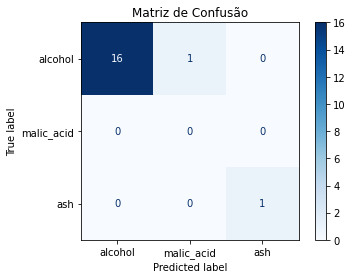

              precision    recall  f1-score   support

           0     1.0000    0.7647    0.8667        17
           1     0.0000    0.0000    0.0000         0
           2     1.0000    1.0000    1.0000         1

    accuracy                         0.7778        18
   macro avg     0.6667    0.5882    0.6222        18
weighted avg     1.0000    0.7778    0.8741        18



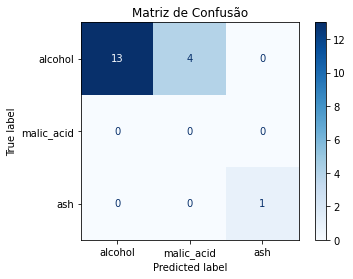

              precision    recall  f1-score   support

           0     1.0000    0.7059    0.8276        17
           1     0.0000    0.0000    0.0000         0
           2     0.3333    1.0000    0.5000         1

    accuracy                         0.7222        18
   macro avg     0.4444    0.5686    0.4425        18
weighted avg     0.9630    0.7222    0.8094        18



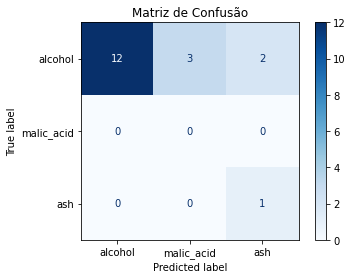

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         8
           1     0.5000    1.0000    0.6667         9
           2     0.0000    0.0000    0.0000         1

    accuracy                         0.5000        18
   macro avg     0.1667    0.3333    0.2222        18
weighted avg     0.2500    0.5000    0.3333        18



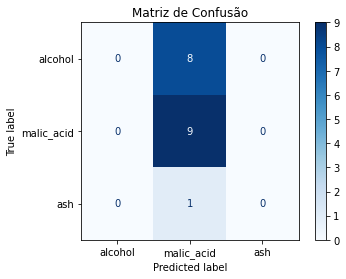

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       0.0
           1     0.0000    0.0000    0.0000      17.0
           2     0.0000    0.0000    0.0000       1.0

    accuracy                         0.0000      18.0
   macro avg     0.0000    0.0000    0.0000      18.0
weighted avg     0.0000    0.0000    0.0000      18.0



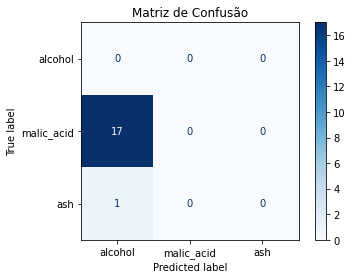

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         0
           1     1.0000    0.8235    0.9032        17
           2     0.5000    1.0000    0.6667         1

    accuracy                         0.8333        18
   macro avg     0.5000    0.6078    0.5233        18
weighted avg     0.9722    0.8333    0.8901        18



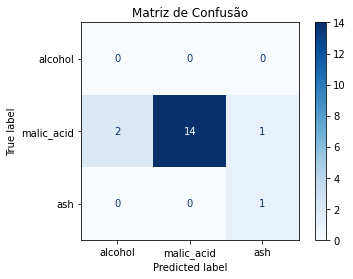

              precision    recall  f1-score   support

           1     1.0000    0.7647    0.8667        17
           2     0.2000    1.0000    0.3333         1

    accuracy                         0.7778        18
   macro avg     0.6000    0.8824    0.6000        18
weighted avg     0.9556    0.7778    0.8370        18



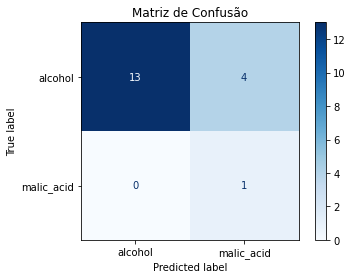

              precision    recall  f1-score   support

           1     0.7692    0.9091    0.8333        11
           2     0.8000    0.5714    0.6667         7

    accuracy                         0.7778        18
   macro avg     0.7846    0.7403    0.7500        18
weighted avg     0.7812    0.7778    0.7685        18



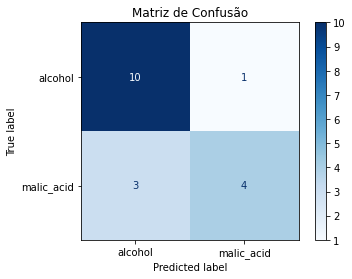

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       0.0
           1     0.0000    0.0000    0.0000       0.0
           2     0.0000    0.0000    0.0000      17.0

    accuracy                         0.0000      17.0
   macro avg     0.0000    0.0000    0.0000      17.0
weighted avg     0.0000    0.0000    0.0000      17.0



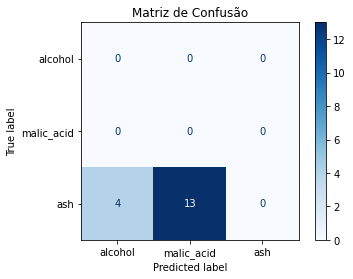

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         0
           2     1.0000    0.3529    0.5217        17

    accuracy                         0.3529        17
   macro avg     0.5000    0.1765    0.2609        17
weighted avg     1.0000    0.3529    0.5217        17



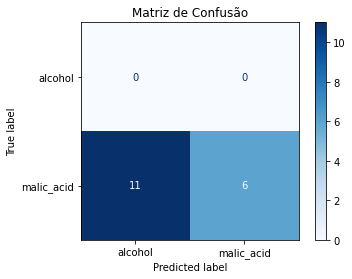

In [33]:
dataTestClassifier = []
for i in range(10):
  dataTestClassifier.append(vector_clfs[i].predict(xtest[i]))

class_names = list(data.columns)
title = "Matriz de Confusão"
classification_reports = []
for i in range(10):
  disp = plot_confusion_matrix(vector_clfs[i], xtest[i], ytest[i], display_labels=class_names, cmap=plt.cm.Blues)
  disp.ax_.set_title(title)
  print(classification_report(ytest[i], dataTestClassifier[i], digits=4))
  classification_reports.append(classification_report(ytest[i], dataTestClassifier[i], digits=4, output_dict=True))
  plt.show()

11) Ao final das 10 execuções do 10-fold cross-validation, apresentar as médias e desvios padrões
dos 10 resultados das medidas de avaliação da função classification_report(...) do modulo
sklearn.metrics.

In [34]:
classificationDataFrames = [] 
for i in range(len(classification_reports)):
  classificationDataFrames.append(pd.DataFrame(classification_reports[i]).transpose())

for i in range(len(classification_reports)):  
  print(f'{classificationDataFrames[i].describe()}\n\n')

       precision    recall  f1-score    support
count   6.000000  6.000000  6.000000   6.000000
mean    0.768519  0.746187  0.757015   9.157407
std     0.398170  0.386698  0.392051   9.335345
min     0.000000  0.000000  0.000000   0.000000
25%     0.736111  0.720588  0.728535   0.958333
50%     0.972222  0.942810  0.957071   9.000000
75%     1.000000  0.944444  0.970960  17.750000
max     1.000000  1.000000  1.000000  18.000000


       precision    recall  f1-score    support
count   6.000000  6.000000  6.000000   6.000000
mean    0.740741  0.651416  0.690123   9.129630
std     0.389153  0.344852  0.360442   9.364872
min     0.000000  0.000000  0.000000   0.000000
25%     0.694444  0.632353  0.661111   0.833333
50%     0.888889  0.771242  0.822222   9.000000
75%     1.000000  0.777778  0.872222  17.750000
max     1.000000  1.000000  1.000000  18.000000


       precision    recall  f1-score    support
count   6.000000  6.000000  6.000000   6.000000
mean    0.577160  0.619826  0.550287